# Indian Food Classification | Tutorial Image Classification Keras

<div style="align:center">
    <img src="https://storage.googleapis.com/kaggle-datasets-images/1147479/1923965/38c32cc6477b8cfb689d3cf85dea70a5/dataset-cover.jpg?t=2021-02-09-06-46-05">
</div>

<br>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#D15817;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
    <p style="padding: 10px;color:white;">CAUTION: Read at your own risk... You might get hungry!</p>
</div>

<br>

## Audience target
<div style="display: inline-black">
    <img src="https://img.shields.io/badge/level-beginner-green">
    <img src="https://img.shields.io/badge/Made%20with-Python3.8-darkgreen?style=flat&logo=python&logoColor=white">
    <img src="https://img.shields.io/badge/Made%20on-Kaggle-20beff?style=flat&logo=kaggle&logoColor=white">
</div>

## Data description

> <ins><b>Full description</b> (by [@Pushkar Jain](https://www.kaggle.com/l33tc0d3r))</ins>: This Dataset contains different images of food in 20 different classes. Some of the classes are of Indian food. All the images are extracted from google. Images per classes are little so Data augmentation and transfer learning will be best suited here. <br><br>
The first goal is to be able to automatically classify an unknown image using the dataset, but beyond this, there are several possibilities for looking at what regions/image components are important for making classifications, build object detectors which can find similar objects in a full scene.

In short here are the main characteristics of the data used for this notebook:
1. **Image** data -> for **classification** issue
2. Classification issue with **20 classes**
3. Structured dataset, optimized to used with **tensorflow-keras**

## Acknowledgements
> This notebook is inspired by *Image classification from scratch* from [keras.io](https://keras.io/examples/vision/image_classification_from_scratch/) which is a tutorial of building a image classification for dogs vs cat. The author of this tutorial is **François CHOLLET**.

# Setup
In this section the main **Python** packages and the packages for the CNN modelling will be loaded.

In [1]:
# Main packages
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # plot handling

In [2]:
# Tensorflow-Keras packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Generate datasets
In this section the data will be loaded by using `image_dataset_from_directory` function from the `tf.keras.preprocessing` module, it is allowed here because we have the following directory setup, where every pictures of food belonging to a class will be placed in the corresponding directory:
```bash
.
└── Food Classification
    └── burger
    │    ├── 001.jpg
    │    ├── 002.jpg
    │    └── 003.jpg
    └── butter_naan
    │    ├── 001.jpg
    │    ├── 002.jpg
    │    └── 003.jpg
    ...
    └── pizza
    │    ├── 001.jpg
    │    ├── 002.jpg
    │    └── 003.jpg
    └── samosa
          ├── 001.jpg
          ├── 002.jpg
          └── 003.jpg
```

<div class="alert alert-block alert-danger">⚠️ If you already have a separate validation directory, then your directory setup would look like the following representation... And the code below will have to change by consequence!</div>

```bash
.
└── Food Classification
    └── train
    │    ├── burger
    │    │     ├── 001.jpg
    │    │     └── 002.jpg
    │     ...
    │    └── samosa
    │          ├── 001.jpg
    │          └── 002.jpg
    └── valid
          ├── burger
          │     ├── 001.jpg
          │     └── 002.jpg
           ...
          └── samosa
                ├── 001.jpg
                └── 002.jpg
```

In [3]:
# Define parameters values
IMG_SIZE = (256, 256)
VALID_SPLIT = 0.3
BATCH_SIZE = 32
SEED = 42
PATH = "../input/indian-food-classification/Food Classification"

# Get train image with generator
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Get validation image with generator
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

Found 6269 files belonging to 20 classes.
Using 4389 files for training.
Found 6269 files belonging to 20 classes.
Using 1880 files for validation.


# Visualize the data

Let us take a look at what our data look like!

In [4]:
# Get class names
classes = train_ds.class_names

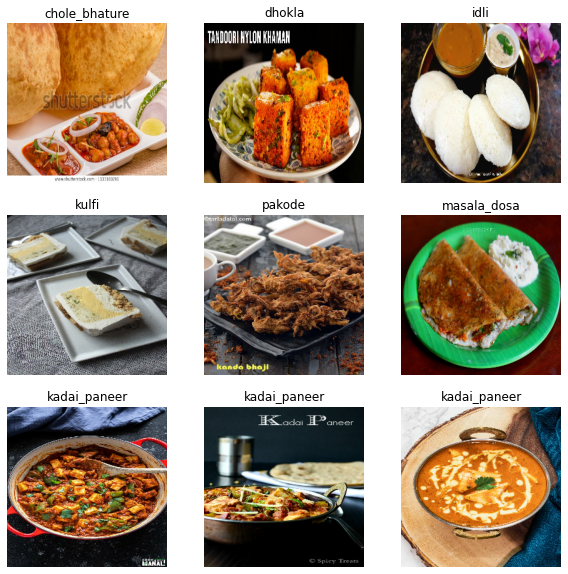

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])
        plt.axis("off")

### Using image data augmentation

<div style="text-align:center;">
    <span style="color:red"><b>Data Augmentation</b></span>
: "<em>Data Augmentation is a regularization technique that’s used to avoid overfitting when training Machine Learning models. Although the technique can be applied in a variety of domains, it’s very common in Computer Vision, and this will be the focus of the tutorial. Adjustments are made to the original images in the training dataset before being used in training. Some example adjustments include translating, croping, scaling, rotating, changing brightness and contrast. We do this to reduce the dependence of the model on spurious characteristics; e.g. training data may only contain faces that fill 1/4 of the image, so the model trainied without data augmentation might unhelpfully learn that faces can only be of this size.</em>" - (Apache MXNet, Data Augmentation With Masks)
</div>



<div style="align:center">
    <figure>
        <img src="https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/data_aug/outputs/with_mask/orig_vs_aug.png">
        <figcaption>From <a href="https://mxnet.apache.org/versions/1.2.1/tutorials/python/data_augmentation_with_masks.html">Data Augmentation with Masks</a></figcaption>
    </figure>
</div>

In [6]:
# Data augmentation: kind of transformations
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
])

# Apply transformation to train data
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Configure the dataset for performance

In [7]:
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

# Build a model


<div class="alert alert-block alert-danger">⚠️ Hey dear readers! The following code for the CNN model has been made without that much of thought, I only took the code from tutorial available on <a href="https://keras.io/examples/vision/image_classification_from_scratch/">keras.io</a>. I can take every suggestions in order to make it better, I am still studying datascience so I apologize in advance I may offend professionals for presenting this model.</div>

In [8]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 512]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    return keras.Model(inputs, outputs)

print(IMG_SIZE + (3,))
model = make_model(input_shape=IMG_SIZE + (3,), num_classes=len(classes))

(256, 256, 3)


In [9]:
# Extend the hidden output if you want to see the model structure
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           sequential[0][0]                 
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        rescaling[0][0]                  
______________________________________________________________________________________________

# Train the model OR Load the mode
depending on the value of `ok`:
- `True`  : Train
- `False` : Load

In [10]:
ok = True

if ok:
    # Parameters
    EPOCHS = 100
    CALLBACK = [
        keras.callbacks.ModelCheckpoint("filepath='model.{epoch:02d}-{val_loss:.2f}.h5'"),
        keras.callbacks.EarlyStopping(patience=15)
    ]
    
    model.compile(
        optimizer='adam',
        loss="categorical_crossentropy",
        metrics=["categorical_accuracy"],
    )
    
    history = model.fit(
        augmented_train_ds,
        epochs=EPOCHS,
        callbacks=CALLBACK,
        validation_data=val_ds,
    )
    
else:
    model = keras.models.load_model('../input/indian-food-classification-keras-cnn/save_at_50.h5')

Epoch 1/100
138/138 [==============================] - 187s 1s/step - loss: 2.7564 - categorical_accuracy: 0.1836 - val_loss: 3.2936 - val_categorical_accuracy: 0.0670
Epoch 2/100
138/138 [==============================] - 128s 907ms/step - loss: 2.3057 - categorical_accuracy: 0.3010 - val_loss: 4.2230 - val_categorical_accuracy: 0.0670
Epoch 3/100
138/138 [==============================] - 128s 907ms/step - loss: 2.1192 - categorical_accuracy: 0.3323 - val_loss: 4.1999 - val_categorical_accuracy: 0.0670
Epoch 4/100
138/138 [==============================] - 126s 897ms/step - loss: 1.9021 - categorical_accuracy: 0.4235 - val_loss: 3.2659 - val_categorical_accuracy: 0.1559
Epoch 5/100
138/138 [==============================] - 130s 925ms/step - loss: 1.7817 - categorical_accuracy: 0.4605 - val_loss: 2.2322 - val_categorical_accuracy: 0.3441
Epoch 6/100
138/138 [==============================] - 132s 937ms/step - loss: 1.6153 - categorical_accuracy: 0.4979 - val_loss: 2.5905 - val_catego

In [11]:
# List all data in history
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


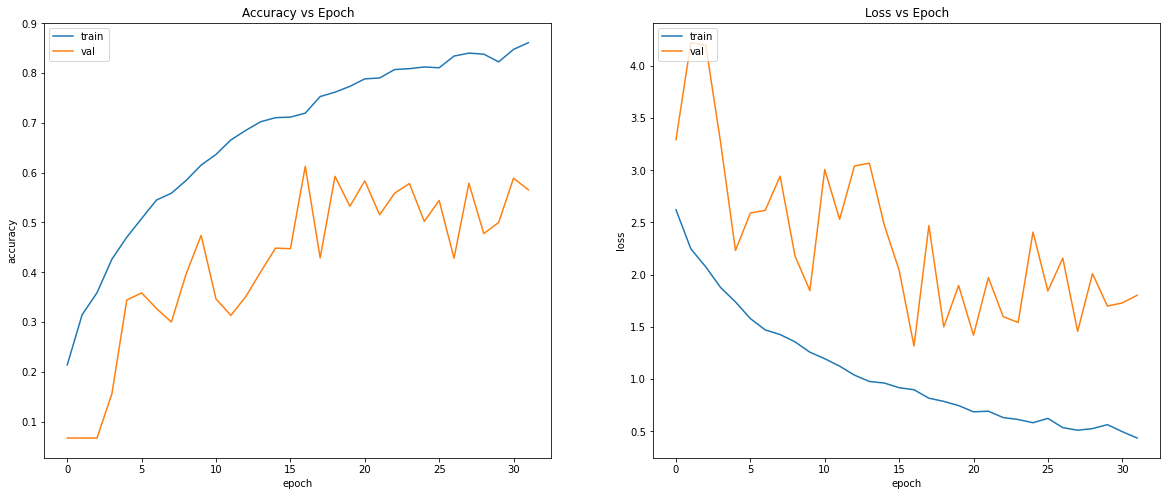

In [12]:
# Create a plot layout
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Summarize history for accuracy
ax[0].plot(history.history['categorical_accuracy'])
ax[0].plot(history.history['val_categorical_accuracy'])
ax[0].set_title('Accuracy vs Epoch')
ax[0].set(xlabel='epoch', ylabel='accuracy')
ax[0].legend(['train', 'val'], loc='upper left')

# Summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper left')

# Display plots
plt.show()

# Run inference on data

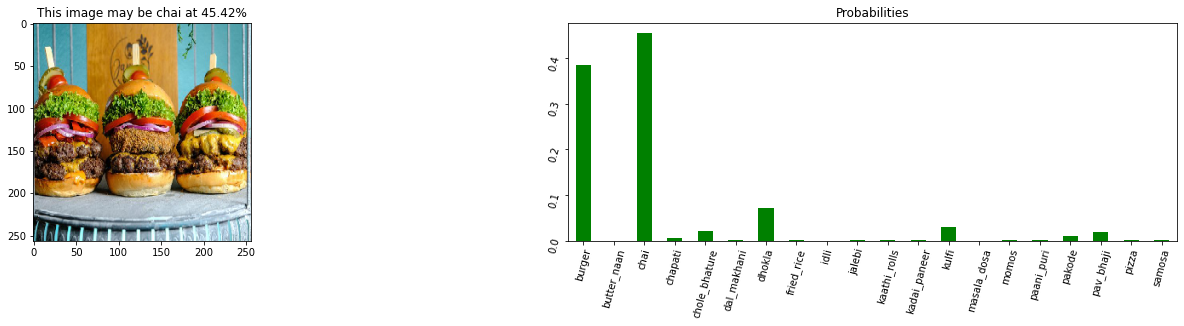

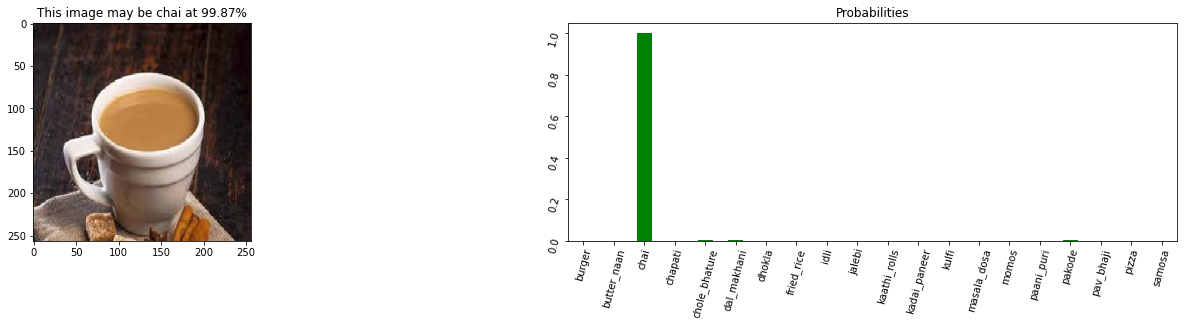

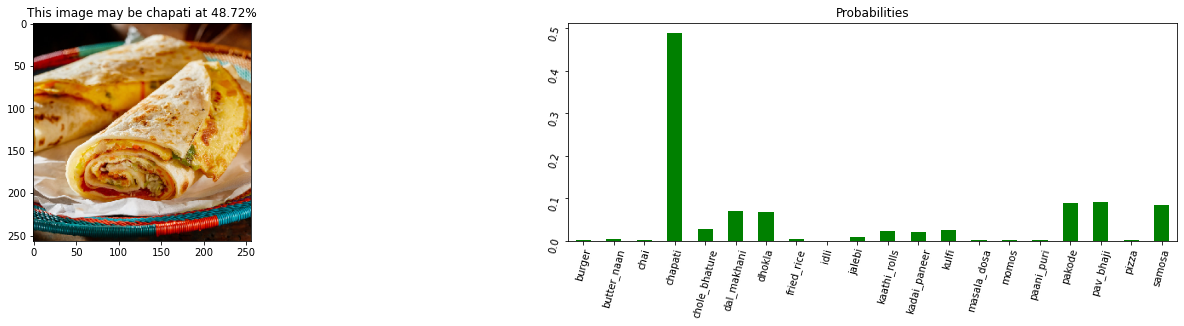

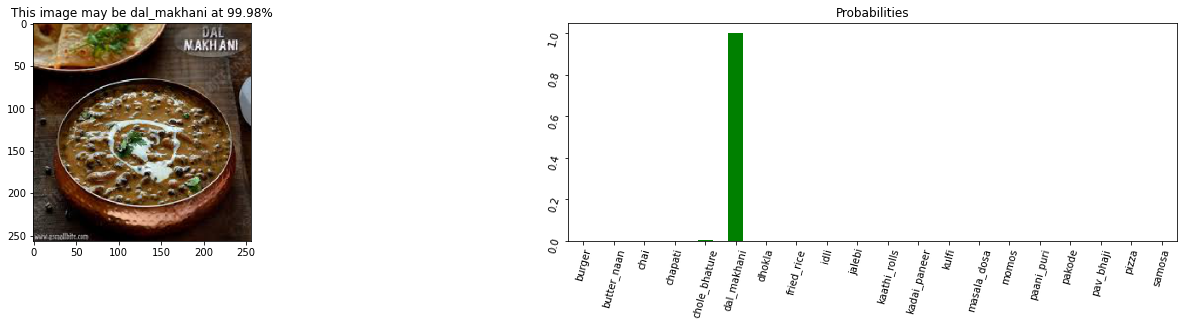

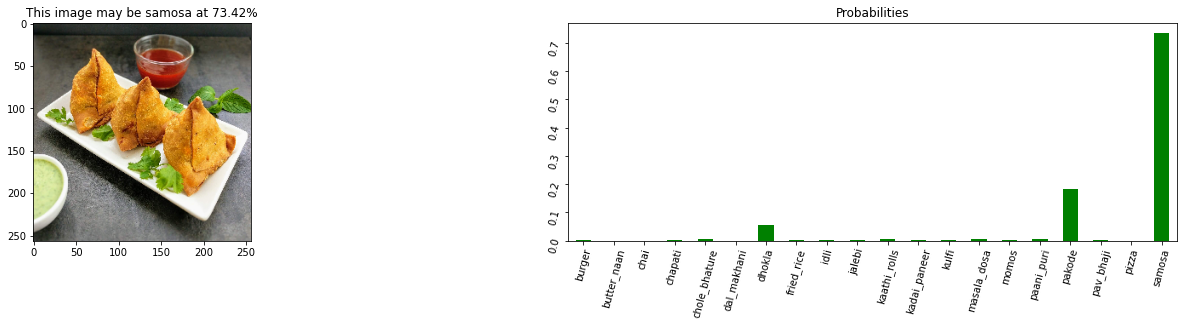

In [13]:
imgs = [
    "../input/indian-food-classification-test-images/burger.jpg",
    "../input/indian-food-classification-test-images/chai.jpeg",
    "../input/indian-food-classification-test-images/chapati.jpeg",
    "../input/indian-food-classification-test-images/dal_makhani.jpeg",
    "../input/indian-food-classification-test-images/samosa.jpg"
]

for img in imgs:
    try:
        # Load the image
        raw_img = keras.preprocessing.image.load_img(img, target_size=IMG_SIZE)
    except:
        continue
    
    # Conver to to numpy array
    img_array = keras.preprocessing.image.img_to_array(raw_img)
    
    # Reshaping
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    
    # Make predictions
    predictions = model.predict(img_array)
    series      = pd.Series(predictions[0], index=classes)
    
    # Get score
    proba      = np.max(predictions)
    pred_class = classes[np.argmax(predictions)]
    
    # Display results
    fig, ax = plt.subplots(1, 2, figsize=(24, 4))
    
    ax[0].imshow(raw_img)
    ax[0].title.set_text(f"This image may be {pred_class} at {round(proba * 100,2)}%")
    
    series.plot(kind='bar', ax=ax[1], color='green')
    ax[1].title.set_text("Probabilities")
    ax[1].tick_params(labelrotation=75)
    
    plt.show()